In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [4]:
df = pd.read_excel('Flight Ticket Price.xlsx')

In [5]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey,Route,Dep_Time
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24/03/2019,BLR → DEL,22:20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1/05/2019,CCU → IXR → BBI → BLR,05:50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9/06/2019,DEL → LKO → BOM → COK,09:25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12/05/2019,CCU → NAG → BLR,18:05
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,01/03/2019,BLR → NAG → DEL,16:50
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107,9/04/2019,CCU → BLR,19:55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145,27/04/2019,CCU → BLR,20:45
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,No info,7229,27/04/2019,BLR → DEL,08:20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648,01/03/2019,BLR → DEL,11:30


In [6]:
df.dtypes

Airline            object
Source             object
Destination        object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Date_of_Journey    object
Route              object
Dep_Time           object
dtype: object

In [7]:
df.tail()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey,Route,Dep_Time
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107,9/04/2019,CCU → BLR,19:55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145,27/04/2019,CCU → BLR,20:45
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,No info,7229,27/04/2019,BLR → DEL,08:20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648,01/03/2019,BLR → DEL,11:30
10682,Air India,Delhi,Cochin,19:15,8h 20m,2 stops,No info,11753,9/05/2019,DEL → GOI → BOM → COK,10:55


In [8]:
# get the basic info 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Arrival_Time     10683 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date_of_Journey  10683 non-null  object
 9   Route            10682 non-null  object
 10  Dep_Time         10683 non-null  object
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
df.shape

(10683, 11)

In [11]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
# feature engineering process 

In [13]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [14]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey,Route,Dep_Time,Date,Month,Year
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24/03/2019,BLR → DEL,22:20,24,03,2019
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1/05/2019,CCU → IXR → BBI → BLR,05:50,1,05,2019
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9/06/2019,DEL → LKO → BOM → COK,09:25,9,06,2019
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12/05/2019,CCU → NAG → BLR,18:05,12,05,2019
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,01/03/2019,BLR → NAG → DEL,16:50,01,03,2019


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Arrival_Time     10683 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date_of_Journey  10683 non-null  object
 9   Route            10682 non-null  object
 10  Dep_Time         10683 non-null  object
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [16]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Arrival_Time     10683 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date_of_Journey  10683 non-null  object
 9   Route            10682 non-null  object
 10  Dep_Time         10683 non-null  object
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [18]:
df.drop('Date_of_Journey',axis=1,inplace = True)

In [19]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route,Dep_Time,Date,Month,Year
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,BLR → DEL,22:20,24,3,2019
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,CCU → IXR → BBI → BLR,05:50,1,5,2019
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,DEL → LKO → BOM → COK,09:25,9,6,2019
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,CCU → NAG → BLR,18:05,12,5,2019
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,BLR → NAG → DEL,16:50,1,3,2019


In [20]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [21]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute']=df['Arrival_Time'].str.split(':').str[1]

In [22]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route,Dep_Time,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,01:10,2h 50m,non-stop,No info,3897,BLR → DEL,22:20,24,3,2019,01,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,CCU → IXR → BBI → BLR,05:50,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,04:25,19h,2 stops,No info,13882,DEL → LKO → BOM → COK,09:25,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,CCU → NAG → BLR,18:05,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,BLR → NAG → DEL,16:50,1,3,2019,21,35


In [23]:
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Arrival_Time     10683 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Route            10682 non-null  object
 9   Dep_Time         10683 non-null  object
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Arrival_Hour     10683 non-null  int32 
 14  Arrival_Minute   10683 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [25]:
df.drop('Arrival_Time',axis=1,inplace = True)

In [26]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route,Dep_Time,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,BLR → DEL,22:20,24,3,2019,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,CCU → IXR → BBI → BLR,05:50,1,5,2019,13,15


In [27]:
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_min']=df['Dep_Time'].str.split(':').str[1]


In [28]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Route', 'Dep_Time', 'Date', 'Month',
       'Year', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_min'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Duration         10683 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Route            10682 non-null  object
 8   Dep_Time         10683 non-null  object
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Arrival_Hour     10683 non-null  int32 
 13  Arrival_Minute   10683 non-null  int32 
 14  Dep_Hour         10683 non-null  object
 15  Dep_min          10683 non-null  object
dtypes: int32(5), int64(1), object(10)
memory usage: 1.1+ MB


In [30]:
df['Dep_Hour'] = df['Dep_Hour'].astype(int)
# df['Dep_min'] = df['Dep_min'].astype(int)
df['Dep_min'] = pd.to_numeric(df['Dep_min'], errors='coerce').fillna(0).astype(int)


In [31]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Route', 'Dep_Time', 'Date', 'Month',
       'Year', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_min'],
      dtype='object')

In [32]:
df.drop('Dep_Time',axis=1,inplace=True)

In [33]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Route', 'Date', 'Month', 'Year',
       'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_min'],
      dtype='object')

In [34]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,BLR → DEL,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,CCU → IXR → BBI → BLR,1,5,2019,13,15,5,50


In [35]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [36]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480,NaN,6,5,2019,9,25,9,45


In [37]:
df['Total_Stops'].mode()

0    1 stop
dtype: object

In [38]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4,np.nan:1})

In [39]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,BLR → DEL,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,CCU → IXR → BBI → BLR,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,DEL → LKO → BOM → COK,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,CCU → NAG → BLR,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,BLR → NAG → DEL,1,3,2019,21,35,16,50


In [40]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_min


In [41]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,BLR → DEL,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,CCU → IXR → BBI → BLR,1,5,2019,13,15,5,50


In [42]:
df.drop('Route',axis=1,inplace=True)

In [43]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


In [44]:
df['Duration'].str.split(' ').str[0].str.split('h').str[0]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10683, dtype: object

In [45]:
df['Duration'].str.split(' ').str[1].str.split('h').str[0]

0        50m
1        25m
2        NaN
3        25m
4        45m
        ... 
10678    30m
10679    35m
10680    NaN
10681    40m
10682    20m
Name: Duration, Length: 10683, dtype: object

In [46]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

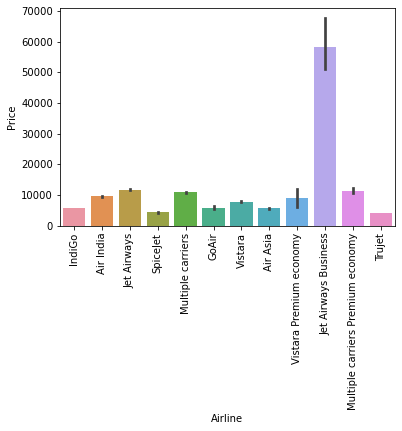

In [47]:
sns.barplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=90)


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

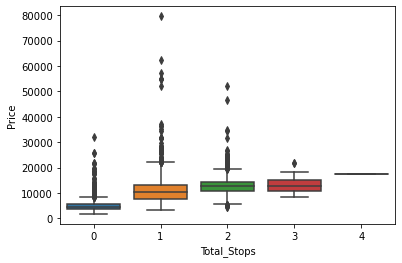

In [48]:
sns.boxplot(x='Total_Stops', y='Price', data=df)


<AxesSubplot:xlabel='Month', ylabel='Price'>

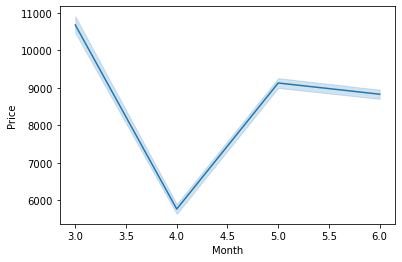

In [49]:
import seaborn as sns 
sns.lineplot(x='Month', y='Price', data=df)


In [50]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [53]:
# Function to convert duration into total minutes safely
def convert_duration(x):
    x = x.strip()  # remove extra spaces
    
    # Initialize hours and minutes
    hours = 0
    minutes = 0
    
    # Check if 'h' exists
    if 'h' in x:
        hours = int(x.split('h')[0])
        x = x.split('h')[1]  # Remaining part after hours
    
    # Check if 'm' exists
    if 'm' in x:
        minutes = int(x.split('m')[0].strip())
    
    return hours*60 + minutes

# Apply to Duration column
df['Duration_total_mins'] = df['Duration'].apply(convert_duration)

# Drop original Duration column
df.drop('Duration', axis=1, inplace=True)


C:\Users\omshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\omshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration_total_mins'>

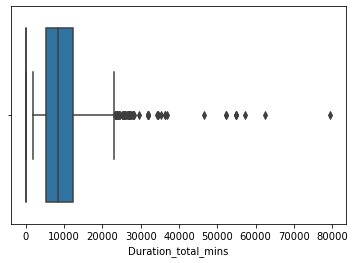

In [55]:
sns.boxplot(df['Price'])
sns.boxplot(df['Duration_total_mins'])


In [56]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['Price'] = df['Price'].clip(lower, upper)


In [57]:
df['Duration_total_mins'] = df['Duration_total_mins'].clip(0, 2400)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

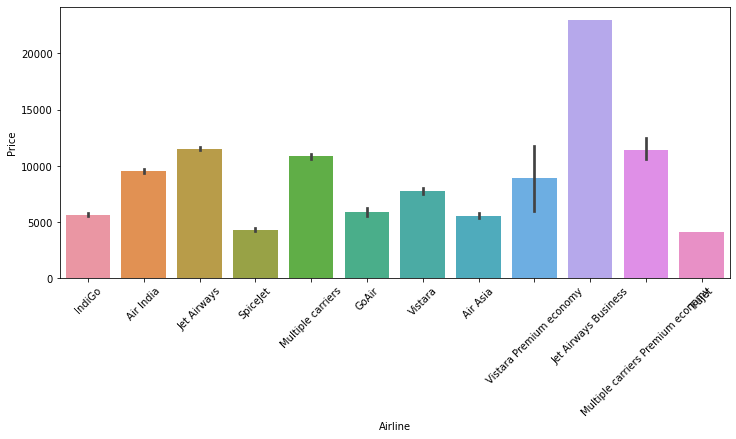

In [58]:
plt.figure(figsize=(12,5))
sns.barplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=45)


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

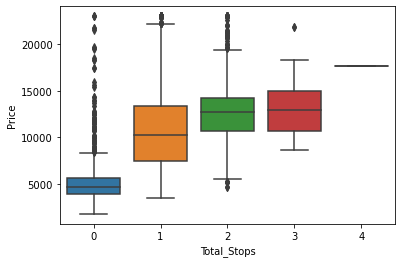

In [59]:
sns.boxplot(x='Total_Stops', y='Price', data=df)


<AxesSubplot:>

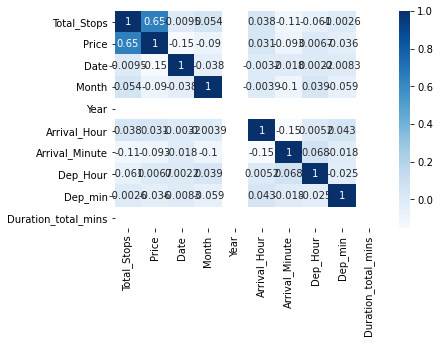

In [60]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')


In [61]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [62]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, r2_score(y_test, pred))


LinearRegression 0.6939200971002971
DecisionTree 0.8829912530917424
RandomForest 0.9251234733483917
